# 맵플롯립 Matplotlib

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

In [10]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

## 지원 되는 플롯 유형

- 선그래프(line plot) : plot()
- 막대그래프(bar chart) : bar()
- 산점도(scatter plot) : scatter() 
- 히스토그램(histogram) : hist()
- 상자 그림(box plot) : boxplot()
- 원그래프(pie chart) : pie()
- 기타 다양한 유형의 차트/플롯을 지원 : 관련 홈페이지 참고
     - https://matplotlib.org/stable/plot_types/index.html

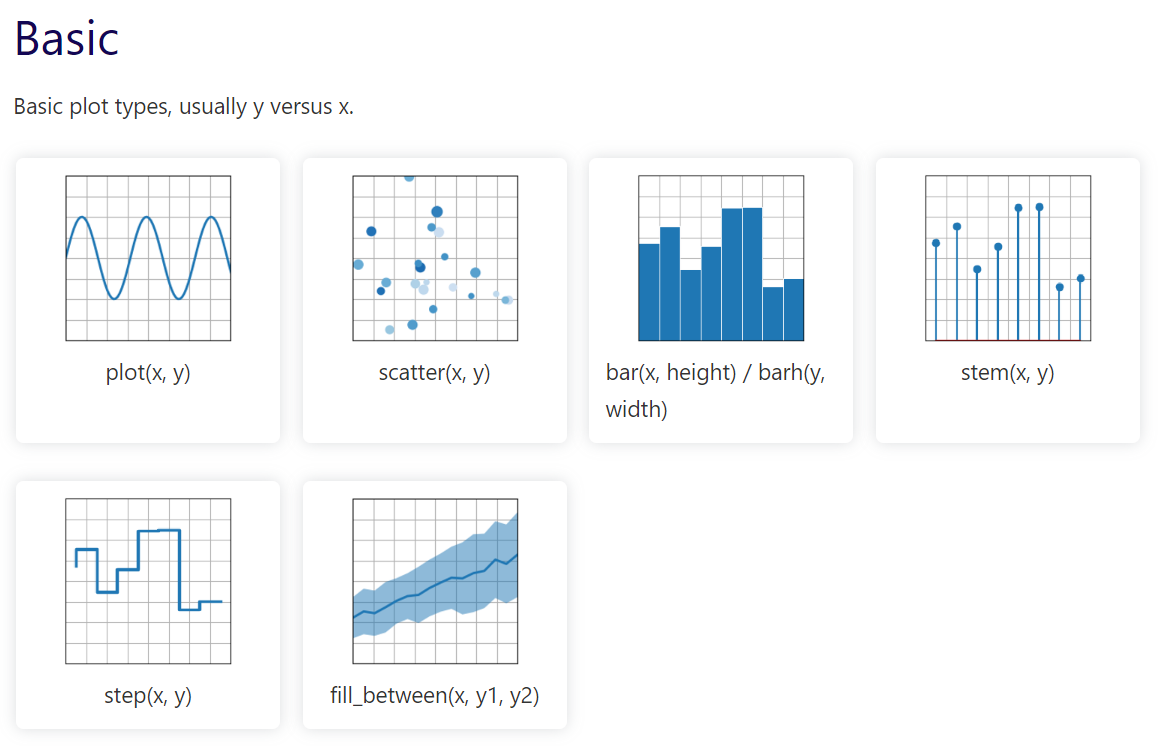
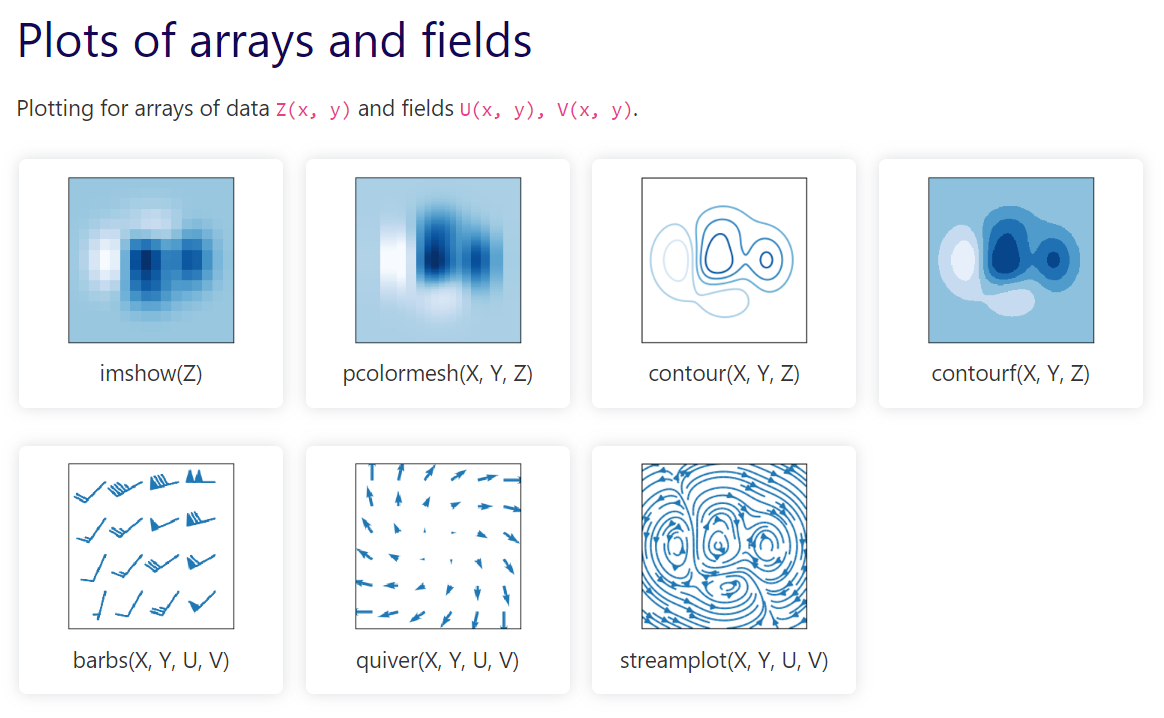
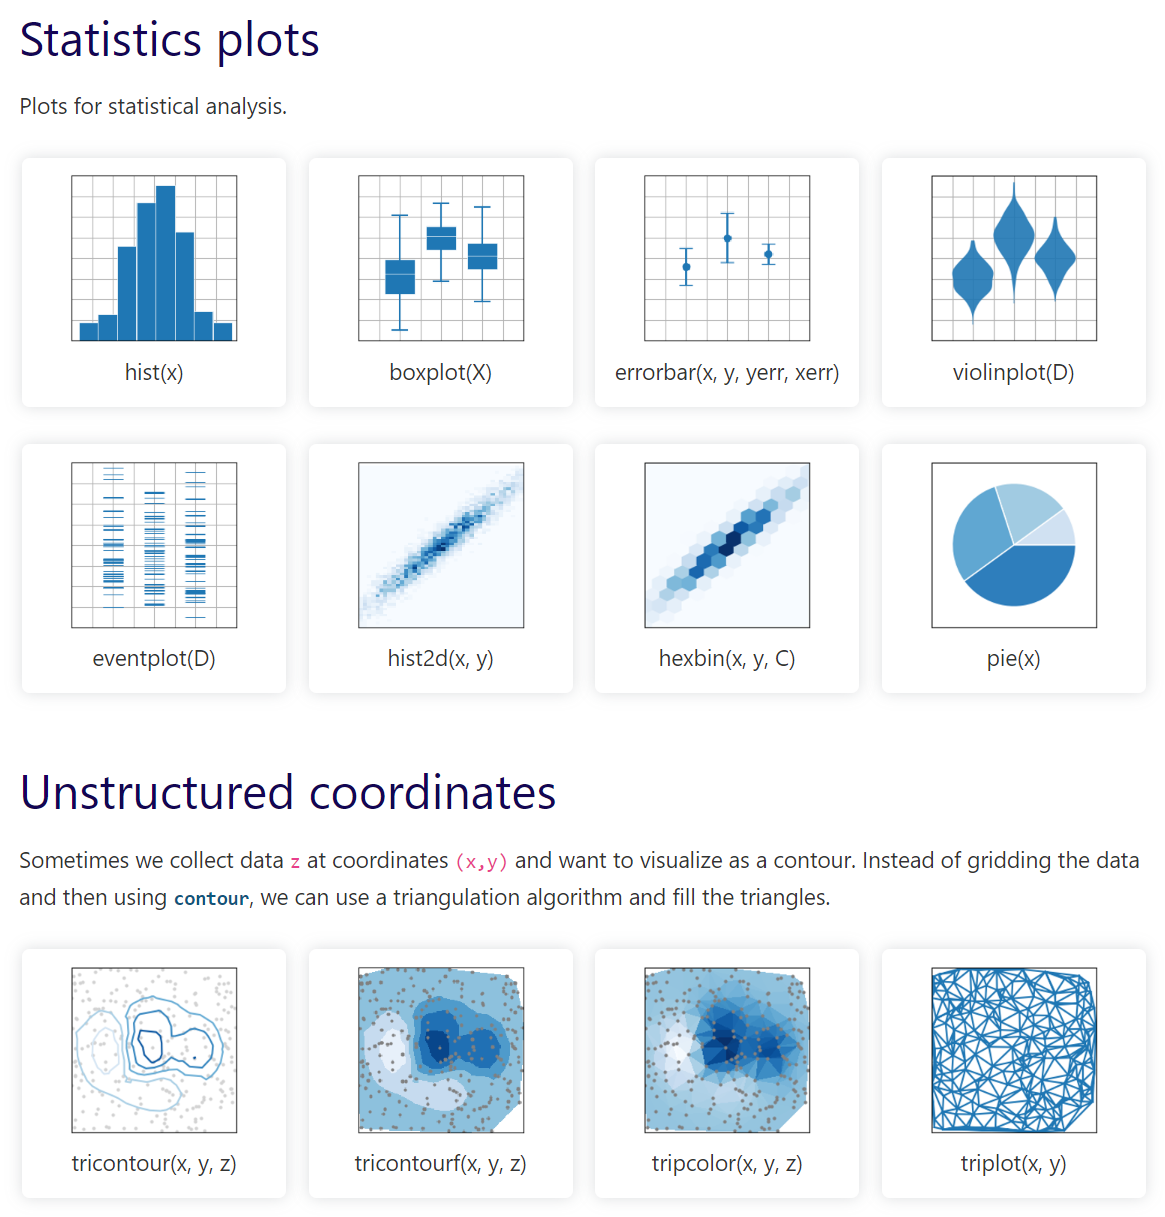

## 1. 막대그래프 : bar(), barh(), df.plot()

### 1-1. 세로 막대 그래프 그리기: bar()
- bar(x,y,color=[],alpha=)
    - color = [] : 색상값 설정
    - alpha = 투명도 설정

#### 데이터셋

In [8]:
y = [2,3,1,6]
x = np.arange(len(y))

z = [2,3]
s = [0,1]

e = [1,6]
h = [2,3]

xlabel = ['가','나','다','라']

#### 막대그래프

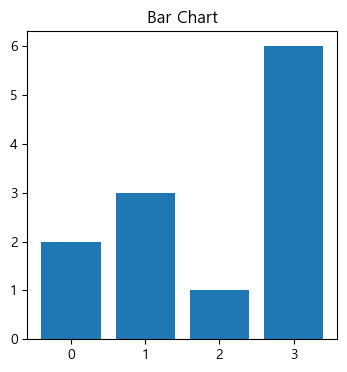

In [9]:
plt.figure(figsize=(4,4))
plt.title('Bar Chart')
plt.bar(x,y)
plt.show()

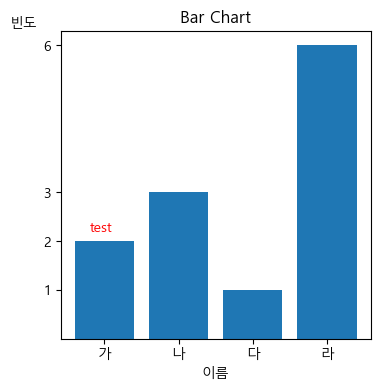

In [10]:
plt.figure(figsize=(4,4))
plt.title('Bar Chart')
plt.bar(x,y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel('이름')
plt.ylabel('빈도', rotation=0, loc='top')
plt.text(-0.2,2.2,'test',c='r')
plt.show()

NameError: name 'x1' is not defined

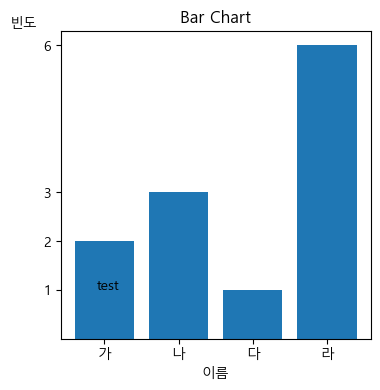

In [11]:
plt.figure(figsize=(4,4))
plt.title('Bar Chart')
plt.bar(x,y)
plt.xticks(x, xlabel)
plt.yticks(sorted(y))
plt.xlabel('이름')
plt.ylabel('빈도', rotation=0, loc='top')
plt.text(-0.1,1,'test')

plt.plot(x1, y1, c='g', ls='--', marker='o')
plt.show()

### 1-2. 가로 막대 그래프 그리기 : barh()

- barh(x,y,color=[], alpha=)

#### 데이터셋

In [12]:
np.random.seed(0)
people = ['몽룡','춘향','방자','향단']
x = np.arange(len(people))
sat = 3 + 10*np.random.rand(len(people))

#### 가로막대그래프

<function matplotlib.pyplot.show(close=None, block=None)>

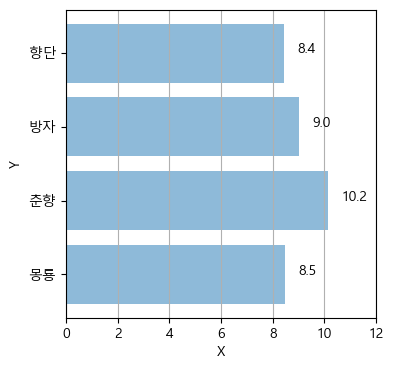

In [13]:
plt.figure(figsize=(4,4))
plt.barh(x, sat, alpha=0.5)
plt.yticks(x, people)
plt.xlim(0,12)
for i in range(len(people)):
    plt.text(sat[i]+0.5,i,np.round(sat[i],1))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(axis = 'x')
plt.show

### 1-3. 데이터프레임으로 막대그래프 그리기

- **데이터프레임.plot**(kind=그래프종류, grid=T/F, figsize=그래프크기)
- **plt.bar**(데이터프레임.변수1, 데이터프레임.변수2)

**데이터프레임.plot()으로 막대그래프 그리기**

- plt.xticks()의 rotation 인수에 따라 가로형 또는 세로형 막대그래프 생성
    - plt.xticks(ticks=None, labels=None, **kwargs)
    - plt.xticks(ticks=None, labels=None) : vertical 기본
    - plt.xticks(ticks=None, labels=None, rotation='vertical') : 가로형막대
    - plt.xticks(ticks=None, labels=None, rotation='horizontal') : 세로형막대

#### 데이터셋

In [14]:
df = pd.DataFrame({'나이':[15,20,17,50,2,30,23],
                  '이름':['둘리','도우너','또치','길동','희동','마이콜','영희']})
df

,나이,이름
0,15,둘리
1,20,도우너
2,17,또치
3,50,길동
4,2,희동
5,30,마이콜
6,23,영희


#### 막대그래프

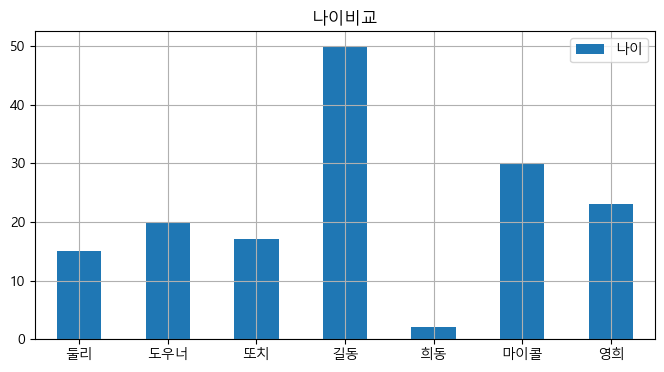

In [15]:
df.plot(kind='bar', grid=True, figsize=(8,4))
plt.xticks(np.arange(df.shape[0]), df.이름, rotation=0)
plt.title('나이비교')
plt.show()

**데이터프레임.plot()를 이용하여 묶음 막대그래프 그리기**
- 그래프를 그리기 위한 데이터를 지정하지 않는 경우
- 데이터프레임에 있는 모든 수치데이터를 이용하여 묶음 막대그래프를 그림

#### 데이터셋

In [16]:
df = pd.DataFrame({'국어':[150,200,170,150,200,130,180],
                   '영어':[150,130,140,150,100,170,160],
                  '이름':['둘리','도우너','또치','길동','희동','마이콜','영희']})
df

,국어,영어,이름
0,150,150,둘리
1,200,130,도우너
2,170,140,또치
3,150,150,길동
4,200,100,희동
5,130,170,마이콜
6,180,160,영희


#### 묶음 막대그래프

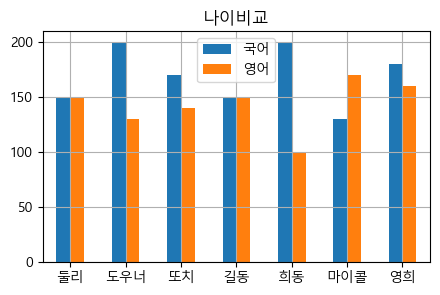

In [17]:
df.plot(kind='bar', grid=True, figsize=(5,3))
plt.xticks(np.arange(df.shape[0]), df.이름, rotation=0)
plt.title('나이비교')
plt.show()

**plt.bar(데이터프레임)를 이용하여 막대그래프 그리기**

<BarContainer object of 7 artists>

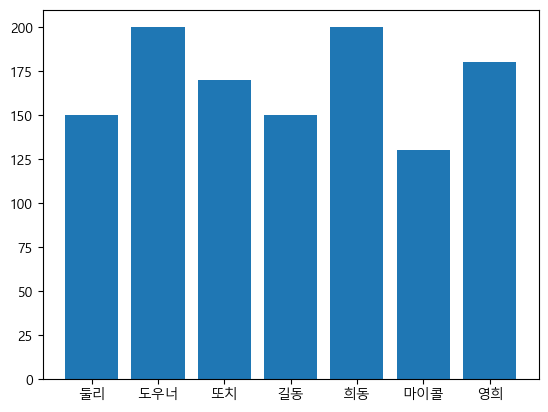

In [18]:
plt.bar(df.이름, df.국어)

**데이터프레임의 일부 필드를 데이터프레임으로 추출하여 그래프 작성**

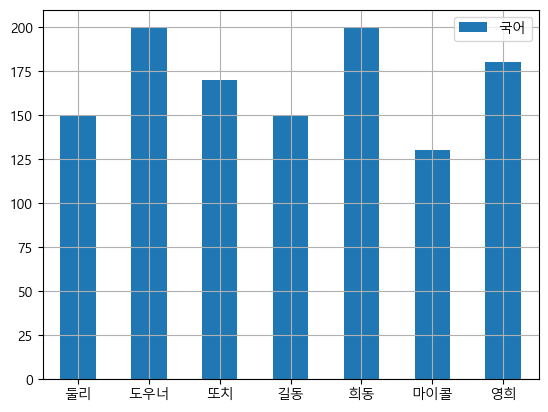

In [19]:
df['국어'].plot(kind='bar')
plt.xticks(np.arange(df.shape[0]), df.이름, rotation=0)
plt.legend()
plt.grid()
plt.show()

**정렬된 데이터를 이용하여 막대그래프 그리기**

In [20]:
df2 = df.sort_values('국어')
df2

,국어,영어,이름
5,130,170,마이콜
0,150,150,둘리
3,150,150,길동
2,170,140,또치
6,180,160,영희
1,200,130,도우너
4,200,100,희동


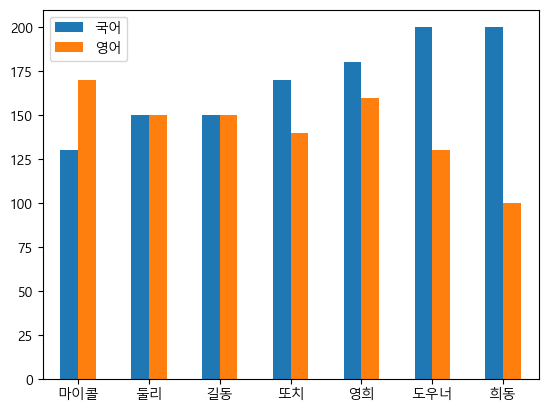

In [21]:
df2.plot(kind='bar')
plt.xticks(np.arange(df2.shape[0]), df2.이름, rotation=0)
plt.show()

## 2. 산점도(scatter plot) : scatter()

- 두 수치형 변수간의 관계를 나타내기 위해 사용하는 그래프
    - 상관관계 표현 : 선형성

In [23]:
x = np.arange(0,10)
y = np.array([9,8,7,9,8,3,2,4,3,4])

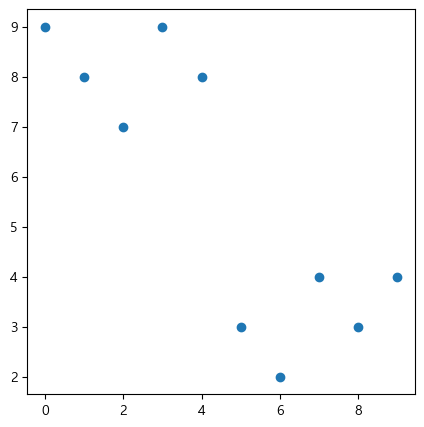

In [24]:
plt.figure(figsize=(5,5))
plt.scatter(x,y)
plt.show()

### 산점도의 marker 변경

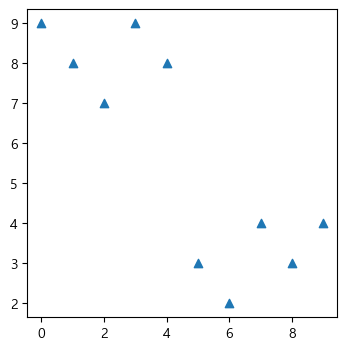

In [25]:
plt.figure(figsize=(4,4))
plt.scatter(x,y, marker='^')
plt.show()

### 버블차트
- 점의 크기와 색상을 이용하여 서로 다른 데이터 값을 표시하는 그래프
- scatter(c, s)를 이용하여 작성
    - s 인수 : size
    - c 인수 : color

In [26]:
n=30
np.random.seed(0)
x = np.random.rand(n)
y1 = np.random.rand(n)
y2 = np.random.rand(n)
y3 = np.pi*(np.random.rand(n)*15)**2  

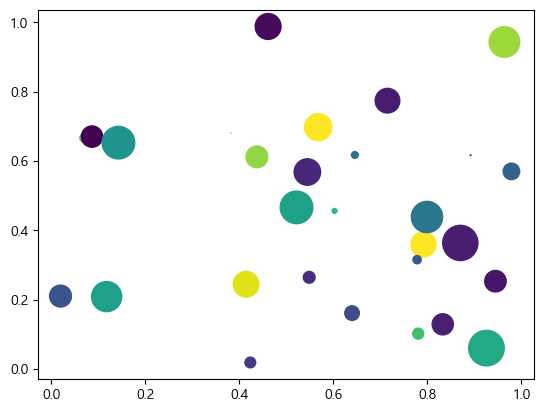

In [27]:
plt.scatter(x,y1,c=y2, s=y3)

### 산점도에 colorbar() 적용

- 산점도를 그린 후 colorbar()를 생성하여 색상 정보를 막대로 표현

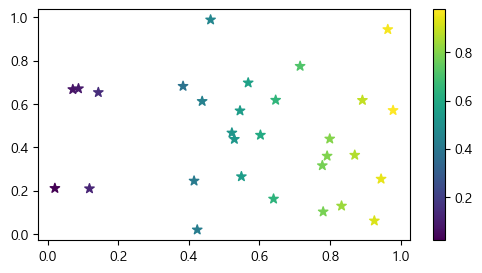

In [28]:
plt.figure(figsize=(6,3))
plt.scatter(x,y1,s=50,c=x, marker='*')
plt.colorbar()
plt.show()

## 3. 히스토그램 : hist()

- 연속형 수치형 데이터의 분포 시각화
- 참고. 막대그래프는 범주형 데이터의 빈도(비율) 분포 시각화

In [32]:
df = 

,국어,영어,이름
0,150,150,둘리
1,200,130,도우너
2,170,140,또치
3,150,150,길동
4,200,100,희동
5,130,170,마이콜
6,180,160,영희


## 4. 박스플롯 : boxplot()

- 데이터의 분포를 파악해주는 플롯
    - 최소값, 제1사분위수, 중위수, 제3사분위수, 최대값
    
- 이상치 데이터 탐색을 위해 사용

In [ ]:
fig, axs = plt.subplots(1,3)

axs[0].hist(tips.total_bill)

axs[1].hist(tips.tip)

axs[2].hist(tips.size)

In [ ]:
tips['total_bill'].plot(kind='hist')

In [1]:
sns.histplot(data=tips, x = 'total_bill')
plt.title('식사대금')
plt.show()

NameError: name 'sns' is not defined

## 5. 파이차트 : pie()

- 범주형 데이터의 빈도(비율)을 비교하기 위해 사용하는 차트
- 원의 형태를 유지할 수 있도록 다음 명령을 실행해야 함
    - plt.axis('equal')
    - 콘솔에서는 별 다른 변화 없으나 plot창에서는 필요함

In [18]:
groups = tips.groupby('sex')

In [19]:
tips.groupby(['sex','smoker'])['tip_pt'].mean()

KeyError: 'Column not found: tip_pt'

In [ ]:
tips.groupby(['sex','smoker']).tip_pt.describe()

In [ ]:
tips.groupby(['day']).tip.sum()

In [21]:
df = pd.DataFrame(tips.groupby(['day']).tip.sum())
df

,tip
day,
Thur,171.83
Fri,51.96
Sat,260.40
Sun,247.39


In [22]:
df.reset_index(inplace =True)

In [23]:
df

,day,tip
0,Thur,171.83
1,Fri,51.96
2,Sat,260.40
3,Sun,247.39


<AxesSubplot:xlabel='day'>

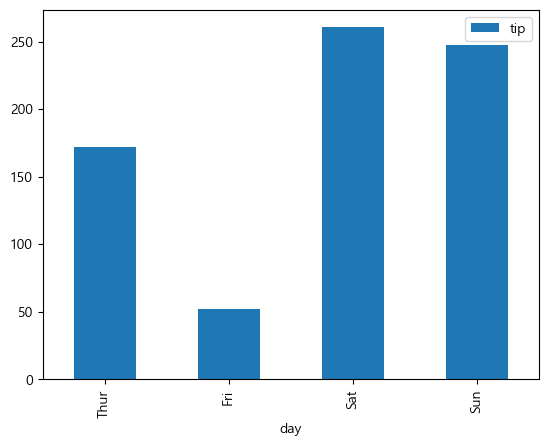

In [24]:
df.plot(kind='bar', x = 'day', y = 'tip')

In [55]:
df = pd.DataFrame(tips.groupby(['day','sex']).tip.sum())
df

tip
day  sex           
Thur Male     89.41
     Female   82.42
Fri  Male     26.93
     Female   25.03
Sat  Male    181.95
     Female   78.45
Sun  Male    186.78
     Female   60.61

In [56]:
df.reset_index(inplace =True)

In [57]:
df2 = df.sort_values(by=['day','sex'], ascending = False)
df2

,day,sex,tip
7,Sun,Female,60.61
6,Sun,Male,186.78
5,Sat,Female,78.45
4,Sat,Male,181.95
3,Fri,Female,25.03
2,Fri,Male,26.93
1,Thur,Female,82.42
0,Thur,Male,89.41


In [42]:
day_g2 = df2.groupby('day')
df2['tip_cumsum'] = day_g2['tip'].cumsum()
df2

,day,sex,tip,tip_cumsum
7,Sun,Female,60.61,60.61
6,Sun,Male,186.78,247.39
5,Sat,Female,78.45,78.45
4,Sat,Male,181.95,260.40
3,Fri,Female,25.03,25.03
2,Fri,Male,26.93,51.96
1,Thur,Female,82.42,82.42
0,Thur,Male,89.41,171.83


In [43]:
df3 = df.sort_values(by=['day','sex'])
df3

,day,sex,tip
0,Thur,Male,89.41
1,Thur,Female,82.42
2,Fri,Male,26.93
3,Fri,Female,25.03
4,Sat,Male,181.95
5,Sat,Female,78.45
6,Sun,Male,186.78
7,Sun,Female,60.61


In [45]:
df3.plot(kind='bar', x = ['day','sex'], y = 'tip')
plt.title('요일과 성별에 따른 팁 그래프')
plt.xlabel('요일')
plt.ylabel('팁')
plt.show()

ValueError: x must be a label or position

In [ ]:
sns.boxplot(x='day', y= 'total_bill', palette = 'Blues_d', data = tips)
plt.tight_layout()
plt.show()

In [7]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


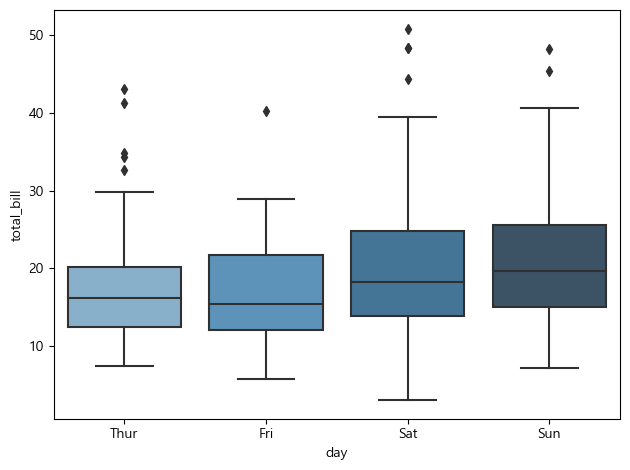

In [11]:
sns.boxplot(x='day', y= 'total_bill', palette = 'Blues_d', data = tips)
plt.tight_layout()
plt.show()

In [47]:
df = pd.DataFrame(tips.groupby(['day']).total_bill.sum())
df
df.reset_index(inplace =True)
df

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


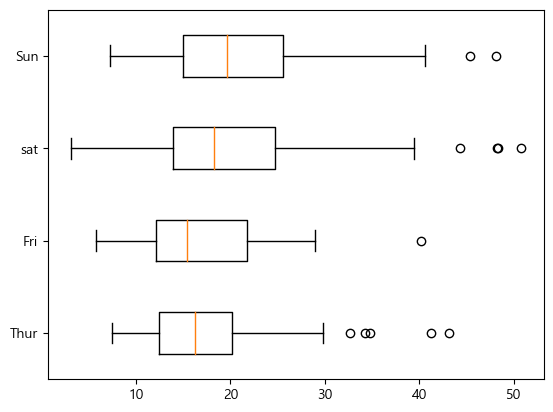

In [51]:
plt.boxplot([tips[tips.day == 'Thur'].total_bill,
             tips[tips.day == 'Fri'].total_bill,
             tips[tips.day == 'Sat'].total_bill,
            tips[tips.day == 'Sun'].total_bill],
           labels = ['Thur','Fri','sat','Sun'], vert = False)
plt.show()

<AxesSubplot:>

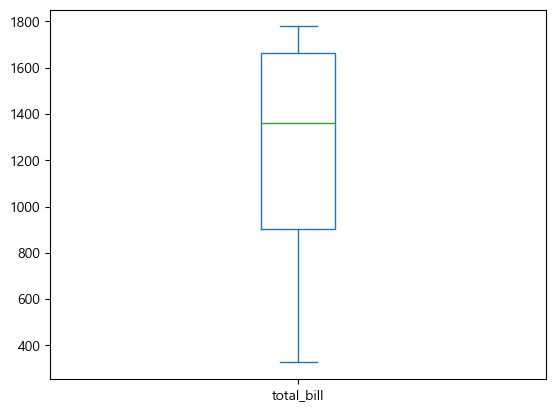

In [48]:
df.plot.box(x = 'day', y = 'total_bill')

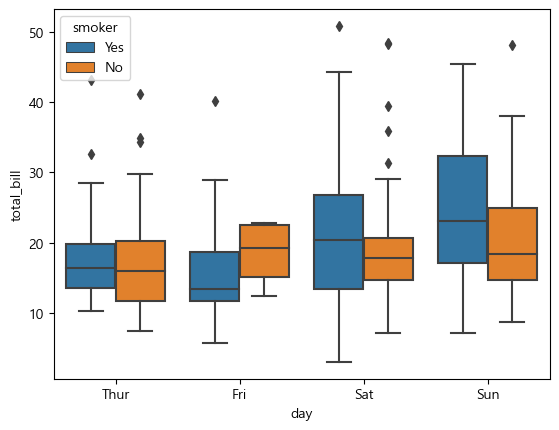

In [52]:
sns.boxplot(x = 'day', y = 'total_bill', hue = 'smoker', data = tips)
plt.show()

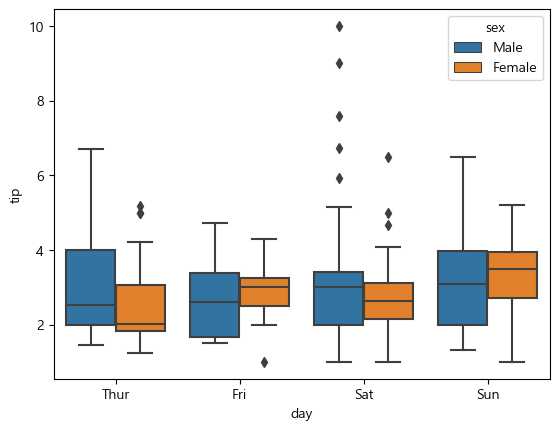

In [53]:
sns.boxplot(x = 'day', y = 'tip', hue = 'sex', data = tips)
plt.show()

In [58]:
df2

,day,sex,tip
7,Sun,Female,60.61
6,Sun,Male,186.78
5,Sat,Female,78.45
4,Sat,Male,181.95
3,Fri,Female,25.03
2,Fri,Male,26.93
1,Thur,Female,82.42
0,Thur,Male,89.41


In [61]:
df4 = df2.pivot(index = 'day', columns= 'sex')['tip']
df4

sex,Male,Female
day,,
Thur,89.41,82.42
Fri,26.93,25.03
Sat,181.95,78.45
Sun,186.78,60.61


<AxesSubplot:xlabel='day'>

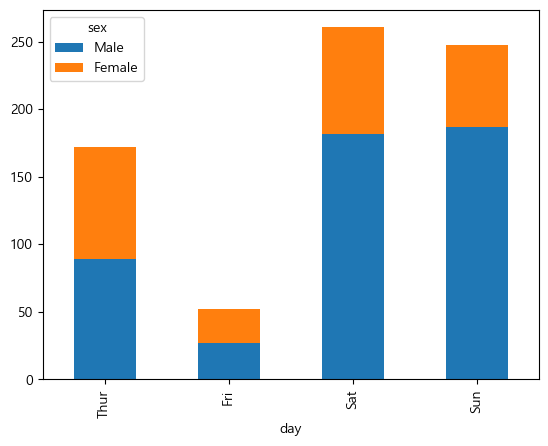

In [65]:
df4.plot(kind='bar', stacked = True)

Text(0, 0.5, 'tips')

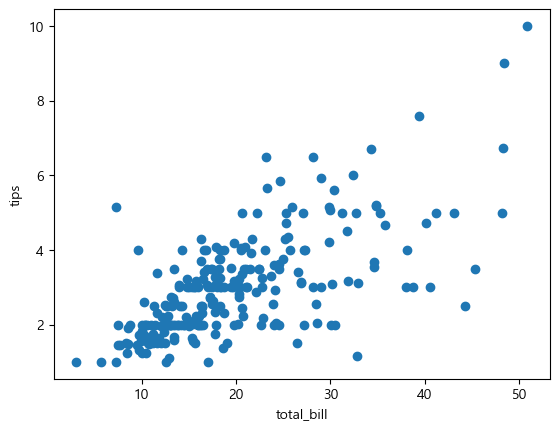

In [68]:
plt.scatter(tips.total_bill, tips.tip)
plt.xlabel('total_bill')
plt.ylabel('tips')


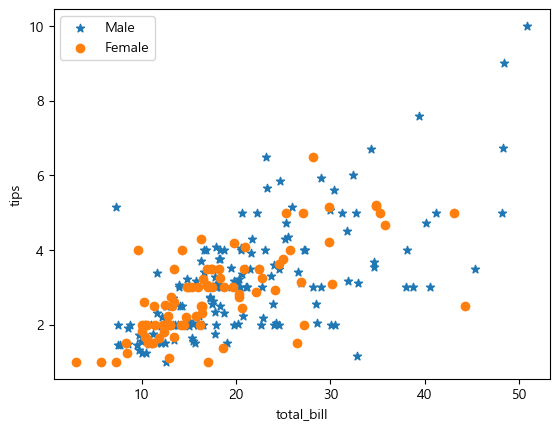

In [83]:
plt.scatter(tips[tips.sex == 'Male'].total_bill, tips[tips.sex == 'Male'].tip,
           marker = '*', label='Male')
plt.scatter(tips[tips.sex == 'Female'].total_bill, tips[tips.sex == 'Female'].tip,
           label = 'Female')
plt.xlabel('total_bill')
plt.ylabel('tips')
plt.legend()
plt.show()

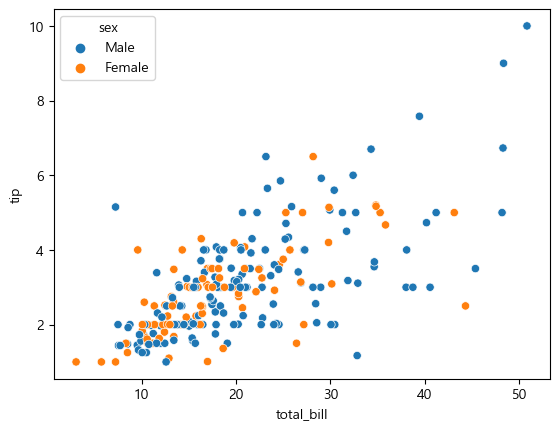

In [80]:
sns.scatterplot(data=tips, x='total_bill', y = 'tip', hue = 'sex')
plt.show()

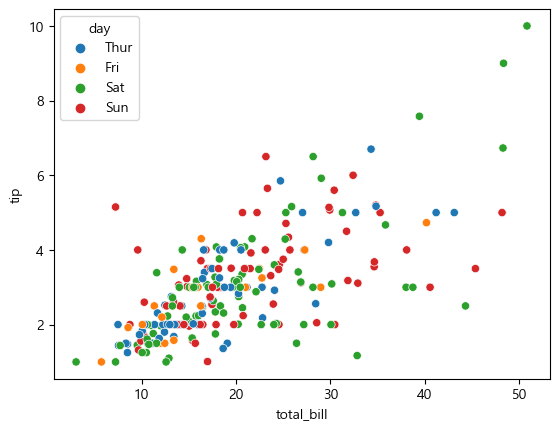

In [81]:
sns.scatterplot(data=tips, x='total_bill', y = 'tip', hue = 'day')
plt.show()

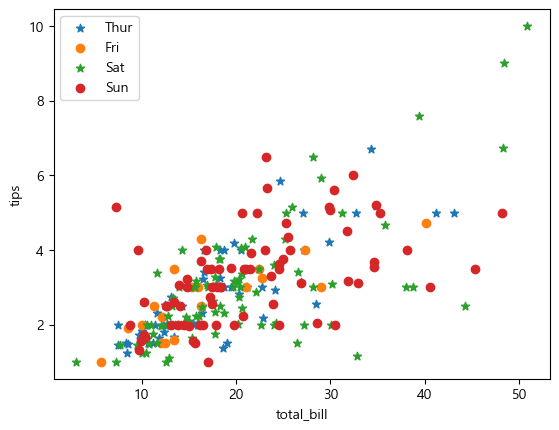

In [85]:
plt.scatter(tips[tips.day == 'Thur'].total_bill, tips[tips.day == 'Thur'].tip,
           marker = '*', label='Thur')
plt.scatter(tips[tips.day == 'Fri'].total_bill, tips[tips.day == 'Fri'].tip,
           label = 'Fri')
plt.scatter(tips[tips.day == 'Sat'].total_bill, tips[tips.day == 'Sat'].tip,
           marker = '*', label='Sat')
plt.scatter(tips[tips.day == 'Sun'].total_bill, tips[tips.day == 'Sun'].tip,
           label = 'Sun')

plt.xlabel('total_bill')
plt.ylabel('tips')
plt.legend()
plt.show()